In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [9]:
x = pd.read_csv("./fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print X.shape,y.shape

(60000, 784) (60000,)


In [17]:
X_train = X.reshape((60000,28,28,1))

# one-hot encoding
Y_train = np_utils.to_categorical(y)

print X_train.shape, Y_train.shape

(60000, 28, 28, 1) (60000, 10)


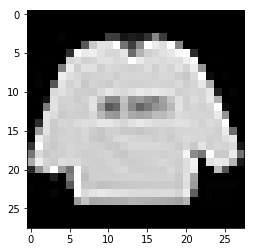

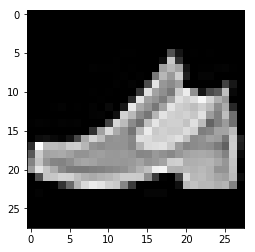

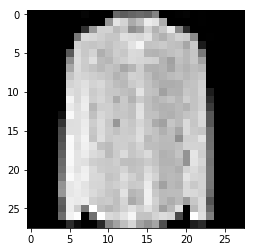

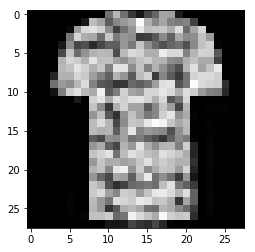

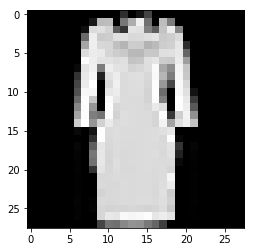

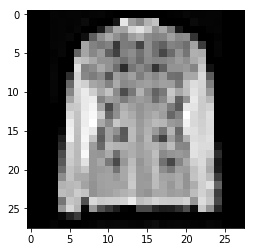

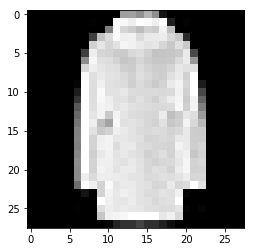

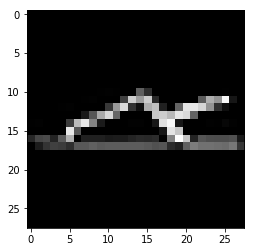

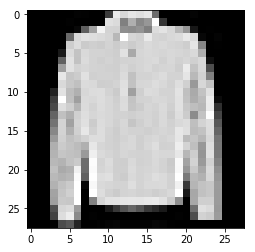

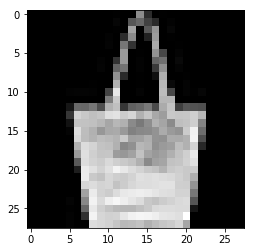

In [13]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], cmap='gray')
plt.show()

In [21]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8, (5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
__________

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
hist = model.fit(X_train,Y_train,
                 epochs = 10,
                 shuffle = True,
                 batch_size = 256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.8092 - acc: 0.7020 - val_loss: 0.5664 - val_acc: 0.8055
Epoch 2/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.4855 - acc: 0.8238 - val_loss: 0.4527 - val_acc: 0.8490
Epoch 3/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.4040 - acc: 0.8558 - val_loss: 0.4037 - val_acc: 0.8651
Epoch 4/10
48000/48000 [==============================] - 81s 2ms/step - loss: 0.3622 - acc: 0.8708 - val_loss: 0.3809 - val_acc: 0.8689
Epoch 5/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3321 - acc: 0.8813 - val_loss: 0.3543 - val_acc: 0.8773
Epoch 6/10
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3100 - acc: 0.8878 - val_loss: 0.3359 - val_acc: 0.8829
Epoch 7/10
48000/48000 [==============================] - 76s 2ms/step - loss: 0.2894 - acc: 0.8952 - val_loss: 0.3112 - val_acc

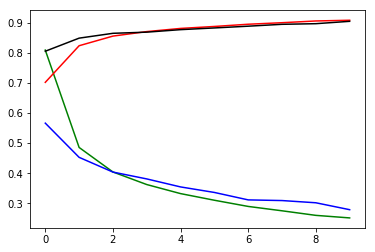

In [24]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()